# GSEApy Analysis

### 1. Import Required Packages
### 2. Import Prior Clustered Data
### 3. Prep Data


Notes: After running analysis, using LRT DEGs appears to miss some of the gene sets that are affected by TCDD since LRT is focusing on changes over time. 

## <br> 1. Import Required Packages

In [1]:
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import seaborn as sns
import gseapy as gp

from scipy import sparse
from anndata import AnnData
from anndata.experimental.multi_files import AnnCollection

In [2]:
print(gp.__version__)

1.0.5


Set figure parameters.

In [3]:
sc.set_figure_params(figsize=(6,6))
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'
pd.options.display.max_colwidth = 200
#plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['pdf.fonttype'] = 'truetype'

## <br> 2. Import DEseq2 LRT Data

In [4]:
B_Cell_LRT = pd.read_csv('../03_Differential_Gene_Expression_Analysis---Deseq2/Results/B_Cell_LRT.txt', delimiter = '\t').reset_index()
Cholangiocyte_LRT = pd.read_csv('../03_Differential_Gene_Expression_Analysis---Deseq2/Results/Cholangiocyte_LRT.txt', delimiter = '\t').reset_index()
Hepatocyte_LRT = pd.read_csv('../03_Differential_Gene_Expression_Analysis---Deseq2/Results/Hepatocyte_LRT.txt', delimiter = '\t').reset_index()
HSC_LRT = pd.read_csv('../03_Differential_Gene_Expression_Analysis---Deseq2/Results/HSC_LRT.txt', delimiter = '\t').reset_index()
LSEC_LRT = pd.read_csv('../03_Differential_Gene_Expression_Analysis---Deseq2/Results/LSEC_LRT.txt', delimiter = '\t').reset_index()
Macrophage_LRT = pd.read_csv('../03_Differential_Gene_Expression_Analysis---Deseq2/Results/Macrophage_LRT.txt', delimiter = '\t').reset_index()
Neutrophil_LRT = pd.read_csv('../03_Differential_Gene_Expression_Analysis---Deseq2/Results/Neutrophil_LRT.txt', delimiter = '\t').reset_index()
pDC_LRT = pd.read_csv('../03_Differential_Gene_Expression_Analysis---Deseq2/Results/pDC_LRT.txt', delimiter = '\t').reset_index()
PF_LRT = pd.read_csv('../03_Differential_Gene_Expression_Analysis---Deseq2/Results/PF_LRT.txt', delimiter = '\t').reset_index()
T_Cell_LRT = pd.read_csv('../03_Differential_Gene_Expression_Analysis---Deseq2/Results/T_Cell_LRT.txt', delimiter = '\t').reset_index()

## <br> 3. Prep Data

In [5]:
B_Cell_LRT

,index,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Gm42418,9721.280933,-0.404126,0.637272,14.490715,0.024610,0.541213
1,Malat1,3845.002291,0.321828,0.225127,8.566048,0.199494,0.993333
2,Cmss1,1590.724138,-0.405227,0.629686,7.799206,0.253186,0.999953
3,Foxp1,795.056702,0.080938,0.253405,6.696347,0.349844,0.999953
4,Camk1d,746.328996,-0.206315,0.433374,9.440393,0.150283,0.946550
...,...,...,...,...,...,...,...
9123,Tubb4b,1.121671,4.329842,1.942351,7.659620,0.264116,NaN
9124,Ubl5,1.493169,3.876795,2.003388,12.675711,0.048485,NaN
9125,Zfp512b,1.364484,-0.680018,1.769766,3.943130,0.684372,NaN
9126,Zfp566,1.324555,1.830338,2.087426,6.883359,0.331769,NaN


In [14]:
# Filter rows where "padj" <= 0.05 and extract values of "index" and "padj" columns
B_Cell_DE_genes = B_Cell_LRT.loc[B_Cell_LRT['padj'] <= 0.05, ['index','padj']]
Cholangiocyte_DE_genes = Cholangiocyte_LRT.loc[Cholangiocyte_LRT['padj'] <= 0.05, ['index','padj']]
Hepatocyte_DE_genes = Hepatocyte_LRT.loc[Hepatocyte_LRT['padj'] <= 0.05, ['index','padj']]
HSC_DE_genes = HSC_LRT.loc[HSC_LRT['padj'] <= 0.05, ['index','padj']]
LSEC_DE_genes = LSEC_LRT.loc[LSEC_LRT['padj'] <= 0.05, ['index','padj']]
Macrophage_DE_genes = Macrophage_LRT.loc[Macrophage_LRT['padj'] <= 0.05, ['index','padj']]
Neutrophil_DE_genes = Neutrophil_LRT.loc[Neutrophil_LRT['padj'] <= 0.05, ['index','padj']]
pDC_DE_genes = pDC_LRT.loc[pDC_LRT['padj'] <= 0.05, ['index','padj']]
PF_DE_genes = PF_LRT.loc[PF_LRT['padj'] <= 0.05, ['index','padj']]
T_Cell_DE_genes = T_Cell_LRT.loc[T_Cell_LRT['padj'] <= 0.05, ['index','padj']]

In [23]:
B_Cell_DE_genes_list = B_Cell_DE_genes['index'].tolist()
Cholangiocyte_DE_genes_list = Cholangiocyte_DE_genes['index'].tolist()
Hepatocyte_DE_genes_list = Hepatocyte_DE_genes['index'].tolist()
HSC_DE_genes_list = HSC_DE_genes['index'].tolist()
LSEC_DE_genes_list = LSEC_DE_genes['index'].tolist()
Macrophage_DE_genes_list = Macrophage_DE_genes['index'].tolist()
Neutrophil_DE_genes_list = Neutrophil_DE_genes['index'].tolist()
pDC_DE_genes_list = pDC_DE_genes['index'].tolist()
PF_DE_genes_list = PF_DE_genes['index'].tolist()
T_Cell_DE_genes_list = T_Cell_DE_genes['index'].tolist()


In [24]:
B_Cell_all_genes_list = B_Cell_LRT['index'].tolist()
Cholangiocyte_all_genes_list = Cholangiocyte_LRT['index'].tolist()
Hepatocyte_all_genes_list = Hepatocyte_LRT['index'].tolist()
HSC_all_genes_list = HSC_LRT['index'].tolist()
LSEC_all_genes_list = LSEC_LRT['index'].tolist()
Macrophage_all_genes_list = Macrophage_LRT['index'].tolist()
Neutrophil_all_genes_list = Neutrophil_LRT['index'].tolist()
pDC_all_genes_list = pDC_LRT['index'].tolist()
PF_all_genes_list = PF_LRT['index'].tolist()
T_Cell_all_genes_list = T_Cell_LRT['index'].tolist()


In [29]:
print("B_Cell_DE_genes_list Dimensions:", len(B_Cell_DE_genes_list))
print("Cholangiocyte_DE_genes_list Dimensions:", len(Cholangiocyte_DE_genes_list))
print("Hepatocyte_DE_genes_list Dimensions:", len(Hepatocyte_DE_genes_list))
print("HSC_DE_genes_list Dimensions:", len(HSC_DE_genes_list))
print("LSEC_DE_genes_list Dimensions:", len(LSEC_DE_genes_list))
print("Macrophage_DE_genes_list Dimensions:", len(Macrophage_DE_genes_list))
print("Neutrophil_DE_genes_list Dimensions:", len(Neutrophil_DE_genes_list))
print("pDC_DE_genes_list Dimensions:", len(pDC_DE_genes_list))
print("PF_DE_genes_list Dimensions:", len(PF_DE_genes_list))
print("T_Cell_DE_genes_list Dimensions:", len(T_Cell_DE_genes_list))


B_Cell_DE_genes_list Dimensions: 35
Cholangiocyte_DE_genes_list Dimensions: 2
Hepatocyte_DE_genes_list Dimensions: 3108
HSC_DE_genes_list Dimensions: 83
LSEC_DE_genes_list Dimensions: 167
Macrophage_DE_genes_list Dimensions: 29
Neutrophil_DE_genes_list Dimensions: 0
pDC_DE_genes_list Dimensions: 0
PF_DE_genes_list Dimensions: 0
T_Cell_DE_genes_list Dimensions: 21


In [30]:
print("B_Cell_all_genes_list Dimensions:", len(B_Cell_all_genes_list))
print("Cholangiocyte_all_genes_list Dimensions:", len(Cholangiocyte_all_genes_list))
print("Hepatocyte_all_genes_list Dimensions:", len(Hepatocyte_all_genes_list))
print("HSC_all_genes_list Dimensions:", len(HSC_all_genes_list))
print("LSEC_all_genes_list Dimensions:", len(LSEC_all_genes_list))
print("Macrophage_all_genes_list Dimensions:", len(Macrophage_all_genes_list))
print("Neutrophil_all_genes_list Dimensions:", len(Neutrophil_all_genes_list))
print("pDC_all_genes_list Dimensions:", len(pDC_all_genes_list))
print("PF_all_genes_list Dimensions:", len(PF_all_genes_list))
print("T_Cell_all_genes_list Dimensions:", len(T_Cell_all_genes_list))

B_Cell_all_genes_list Dimensions: 9128
Cholangiocyte_all_genes_list Dimensions: 5574
Hepatocyte_all_genes_list Dimensions: 17250
HSC_all_genes_list Dimensions: 12232
LSEC_all_genes_list Dimensions: 13426
Macrophage_all_genes_list Dimensions: 11226
Neutrophil_all_genes_list Dimensions: 1386
pDC_all_genes_list Dimensions: 2926
PF_all_genes_list Dimensions: 6374
T_Cell_all_genes_list Dimensions: 9530


## <br> 4. Conduct Enrichr

In [32]:
Enrichr_B_Cell = gp.enrichr(gene_list=B_Cell_DE_genes_list,
                            background=B_Cell_all_genes_list,
                            gene_sets="TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt",
                            organism='mouse',
                            outdir="./Results/B_Cell_LRT_Enrichr",
                            verbose=True, # see what's going on behind the scenes
                            )

Enrichr_Cholangiocyte = gp.enrichr(gene_list=Cholangiocyte_DE_genes_list,
                            background=Cholangiocyte_all_genes_list,
                            gene_sets="TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt",
                            organism='mouse',
                            outdir="./Results/Cholangiocyte_LRT_Enrichr",
                            verbose=True, # see what's going on behind the scenes
                            )

Enrichr_Hepatocyte = gp.enrichr(gene_list=Hepatocyte_DE_genes_list,
                            background=Hepatocyte_all_genes_list,
                            gene_sets="TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt",
                            organism='mouse',
                            outdir="./Results/Hepatocyte_LRT_Enrichr",
                            verbose=True, # see what's going on behind the scenes
                            )

Enrichr_HSC = gp.enrichr(gene_list=HSC_DE_genes_list,
                            background=HSC_all_genes_list,
                            gene_sets="TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt",
                            organism='mouse',
                            outdir="./Results/HSC_LRT_Enrichr",
                            verbose=True, # see what's going on behind the scenes
                            )

Enrichr_LSEC = gp.enrichr(gene_list=LSEC_DE_genes_list,
                            background=LSEC_all_genes_list,
                            gene_sets="TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt",
                            organism='mouse',
                            outdir="./Results/LSEC_LRT_Enrichr",
                            verbose=True, # see what's going on behind the scenes
                            )

Enrichr_Macrophage = gp.enrichr(gene_list=Macrophage_DE_genes_list,
                            background=Macrophage_all_genes_list,
                            gene_sets="TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt",
                            organism='mouse',
                            outdir="./Results/Macrophage_LRT_Enrichr",
                            verbose=True, # see what's going on behind the scenes
                            )

# Enrichr_Neutrophil = gp.enrichr(gene_list=Neutrophil_DE_genes_list,
#                             background=Neutrophil_all_genes_list,
#                             gene_sets="TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt",
#                             organism='mouse',
#                             outdir="./Results/Neutrophil_LRT_Enrichr",
#                             verbose=True, # see what's going on behind the scenes
#                             )

Enrichr_pDC = gp.enrichr(gene_list=pDC_DE_genes_list,
                            background=pDC_all_genes_list,
                            gene_sets="TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt",
                            organism='mouse',
                            outdir="./Results/pDC_LRT_Enrichr",
                            verbose=True, # see what's going on behind the scenes
                            )

Enrichr_PF = gp.enrichr(gene_list=PF_DE_genes_list,
                            background=PF_all_genes_list,
                            gene_sets="TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt",
                            organism='mouse',
                            outdir="./Results/PF_LRT_Enrichr",
                            verbose=True, # see what's going on behind the scenes
                            )


Enrichr_T_Cell = gp.enrichr(gene_list=T_Cell_DE_genes_list,
                            background=T_Cell_all_genes_list,
                            gene_sets="TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt",
                            organism='mouse',
                            outdir="./Results/T_Cell_LRT_Enrichr",
                            verbose=True, # see what's going on behind the scenes
                            )

2023-07-06 10:55:54,577 [INFO] User defined gene sets is given: TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt
2023-07-06 10:55:54,693 [INFO] Run: TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt 
2023-07-06 10:55:56,048 [INFO] Save enrichment results for TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt 
2023-07-06 10:55:56,569 [INFO] Done.
2023-07-06 10:55:56,572 [INFO] User defined gene sets is given: TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt
2023-07-06 10:55:56,703 [INFO] Run: TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt 
2023-07-06 10:55:56,910 [INFO] Save enrichment results for TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt 
2023-07-06 10:55:57,600 [INFO] Done.
2023-07-06 10:55:57,616 [INFO] User defined gene sets is given: TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt
2023-07-06 10:55:57,726 [INFO] Run: TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt 
2023-07-06 10:56:25,341 [INFO] Save enrichment results for TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt 
2023-07-06 10:56:26,064 [INFO] Done.
2023-07-06 10:56:26,081 [INFO] User d

In [36]:
Enrichr_B_Cell_RESULTS = Enrichr_B_Cell.res2d
Enrichr_Cholangiocyte_RESULTS = Enrichr_Cholangiocyte.res2d
Enrichr_Hepatocyte_RESULTS = Enrichr_Hepatocyte.res2d
Enrichr_HSC_RESULTS = Enrichr_HSC.res2d
Enrichr_LSEC_RESULTS = Enrichr_LSEC.res2d
Enrichr_Macrophage_RESULTS = Enrichr_Macrophage.res2d
Enrichr_T_Cell_RESULTS = Enrichr_T_Cell.res2d


In [37]:
Enrichr_B_Cell_RESULTS['Celltype'] = 'B_Cell'
Enrichr_Cholangiocyte_RESULTS['Celltype'] = 'Cholangiocyte'
Enrichr_Hepatocyte_RESULTS['Celltype'] = 'Hepatocyte'
Enrichr_HSC_RESULTS['Celltype'] = 'HSC'
Enrichr_LSEC_RESULTS['Celltype'] = 'LSEC'
Enrichr_Macrophage_RESULTS['Celltype'] = 'Macrophage'
Enrichr_T_Cell_RESULTS['Celltype'] = 'T_Cell'

In [39]:
# Concatenate all the DataFrames into one
Enrichr_MASTER_LRT = pd.concat([Enrichr_B_Cell_RESULTS,
                               Enrichr_Cholangiocyte_RESULTS,
                               Enrichr_Hepatocyte_RESULTS,
                               Enrichr_HSC_RESULTS,
                               Enrichr_LSEC_RESULTS,
                               Enrichr_Macrophage_RESULTS,
                               Enrichr_T_Cell_RESULTS], ignore_index=True)

# Print the merged DataFrame
Enrichr_MASTER_LRT

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,Celltype
0,TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt,BIOCARTA_MM_MECHANISM_OF_GENE_REGULATION_BY_PEROXISOME_PROLIFERATORS_VIA_PPARA-ALPHA_Ensembl,1/31,0.112450,0.182638,12.556936,27.440041,Me1,B_Cell
1,TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt,BIOCARTA_MM_NUCLEAR_RECEPTORS_IN_LIPID_METABOLISM_AND_TOXICITY_Ensembl,2/22,0.003144,0.043236,30.203980,174.039512,Nr1i3;Cyp2e1,B_Cell
2,TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt,EHMN_MM_AMINOSUGARS_METABOLISM_Ensembl,1/12,0.045081,0.119849,31.709565,98.277409,Fmo3,B_Cell
3,TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt,EHMN_MM_ANDROGEN_AND_ESTROGEN_BIOSYNTHESIS_AND_METABOLISM_Ensembl,1/34,0.122656,0.190690,11.461248,24.049981,Cyp2e1,B_Cell
4,TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt,EHMN_MM_ARACHIDONIC_ACID_METABOLISM_Ensembl,1/33,0.119266,0.188406,11.804672,25.101399,Cyp2e1,B_Cell
...,...,...,...,...,...,...,...,...,...
23414,TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt,WIKIPATHWAYS_MM_OXIDATIVE_STRESS-WP408_Ensembl,1/17,0.036838,0.083761,39.777700,131.315278,Gclc,T_Cell
23415,TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt,WIKIPATHWAYS_MM_SIDS_SUSCEPTIBILITY_PATHWAYS-WP706_Ensembl,1/27,0.057900,0.099897,25.286475,72.042283,Ddc,T_Cell
23416,TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt,WIKIPATHWAYS_MM_TAMOXIFEN_METABOLISM-WP691_Ensembl,2/8,0.000128,0.008993,143.627451,1286.875516,Cyp2e1;Fmo3,T_Cell
23417,TZ_mGSKB-parsed_Hep-Secretome_Symbol.gmt,WIKIPATHWAYS_MM_TRYPTOPHAN_METABOLISM-WP465_Ensembl,3/34,0.000053,0.005176,52.076381,512.884573,Aox1;Ddc;Cyp2e1,T_Cell


In [40]:
# Remove the "Gene_set" column from the DataFrame
Enrichr_MASTER_LRT = Enrichr_MASTER_LRT.drop("Gene_set", axis=1)

# Print the modified DataFrame
Enrichr_MASTER_LRT

,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,Celltype
0,BIOCARTA_MM_MECHANISM_OF_GENE_REGULATION_BY_PEROXISOME_PROLIFERATORS_VIA_PPARA-ALPHA_Ensembl,1/31,0.112450,0.182638,12.556936,27.440041,Me1,B_Cell
1,BIOCARTA_MM_NUCLEAR_RECEPTORS_IN_LIPID_METABOLISM_AND_TOXICITY_Ensembl,2/22,0.003144,0.043236,30.203980,174.039512,Nr1i3;Cyp2e1,B_Cell
2,EHMN_MM_AMINOSUGARS_METABOLISM_Ensembl,1/12,0.045081,0.119849,31.709565,98.277409,Fmo3,B_Cell
3,EHMN_MM_ANDROGEN_AND_ESTROGEN_BIOSYNTHESIS_AND_METABOLISM_Ensembl,1/34,0.122656,0.190690,11.461248,24.049981,Cyp2e1,B_Cell
4,EHMN_MM_ARACHIDONIC_ACID_METABOLISM_Ensembl,1/33,0.119266,0.188406,11.804672,25.101399,Cyp2e1,B_Cell
...,...,...,...,...,...,...,...,...
23414,WIKIPATHWAYS_MM_OXIDATIVE_STRESS-WP408_Ensembl,1/17,0.036838,0.083761,39.777700,131.315278,Gclc,T_Cell
23415,WIKIPATHWAYS_MM_SIDS_SUSCEPTIBILITY_PATHWAYS-WP706_Ensembl,1/27,0.057900,0.099897,25.286475,72.042283,Ddc,T_Cell
23416,WIKIPATHWAYS_MM_TAMOXIFEN_METABOLISM-WP691_Ensembl,2/8,0.000128,0.008993,143.627451,1286.875516,Cyp2e1;Fmo3,T_Cell
23417,WIKIPATHWAYS_MM_TRYPTOPHAN_METABOLISM-WP465_Ensembl,3/34,0.000053,0.005176,52.076381,512.884573,Aox1;Ddc;Cyp2e1,T_Cell


In [42]:
Enrichr_MASTER_LRT['Term'] = Enrichr_MASTER_LRT['Term'].str.replace('_Ensembl', '')

# Print the modified DataFrame
Enrichr_MASTER_LRT

,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,Celltype
0,BIOCARTA_MM_MECHANISM_OF_GENE_REGULATION_BY_PEROXISOME_PROLIFERATORS_VIA_PPARA-ALPHA,1/31,0.112450,0.182638,12.556936,27.440041,Me1,B_Cell
1,BIOCARTA_MM_NUCLEAR_RECEPTORS_IN_LIPID_METABOLISM_AND_TOXICITY,2/22,0.003144,0.043236,30.203980,174.039512,Nr1i3;Cyp2e1,B_Cell
2,EHMN_MM_AMINOSUGARS_METABOLISM,1/12,0.045081,0.119849,31.709565,98.277409,Fmo3,B_Cell
3,EHMN_MM_ANDROGEN_AND_ESTROGEN_BIOSYNTHESIS_AND_METABOLISM,1/34,0.122656,0.190690,11.461248,24.049981,Cyp2e1,B_Cell
4,EHMN_MM_ARACHIDONIC_ACID_METABOLISM,1/33,0.119266,0.188406,11.804672,25.101399,Cyp2e1,B_Cell
...,...,...,...,...,...,...,...,...
23414,WIKIPATHWAYS_MM_OXIDATIVE_STRESS-WP408,1/17,0.036838,0.083761,39.777700,131.315278,Gclc,T_Cell
23415,WIKIPATHWAYS_MM_SIDS_SUSCEPTIBILITY_PATHWAYS-WP706,1/27,0.057900,0.099897,25.286475,72.042283,Ddc,T_Cell
23416,WIKIPATHWAYS_MM_TAMOXIFEN_METABOLISM-WP691,2/8,0.000128,0.008993,143.627451,1286.875516,Cyp2e1;Fmo3,T_Cell
23417,WIKIPATHWAYS_MM_TRYPTOPHAN_METABOLISM-WP465,3/34,0.000053,0.005176,52.076381,512.884573,Aox1;Ddc;Cyp2e1,T_Cell


In [89]:
subset = Enrichr_MASTER_LRT[Enrichr_MASTER_LRT['Term'].str.contains('KEGG')]
subset = subset[subset['Adjusted P-value'] <= 0.1]
subset = subset.sort_values('Adjusted P-value')
subset['Size'] = subset['Adjusted P-value'].apply(lambda x: 300 if x == 0 else 10 + ((0.1 - x) / 0.1) * 290)

# Create a mapping dictionary for Celltype to X_COOR values
celltype_mapping = {
    'Hepatocyte': 1,
    'LSEC': 2,
    'HSC': 3,
    'Macrophage': 4,
    'B_Cell': 5,
    'T_Cell': 6,
    'Cholangiocyte': 7
}

subset['X_COOR'] = subset['Celltype'].map(celltype_mapping)


color_mapping = {
    'Hepatocyte': '#db5f57',
    'LSEC': '#dbae57',
    'HSC': '#b9db57',
    'Macrophage': '#69db57',
    'B_Cell': '#57db94',
    'T_Cell': '#57d3db',
    'PF': '#5784db',
    'Cholangiocyte': '#7957db',
    'Neutrophil': '#c957db',
    'pDC': '#db579e'
}

subset['Color'] = subset['Celltype'].map(color_mapping)

subset

,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,Celltype,Size,X_COOR,Color
18926,KEGG_MM_PROTEIN_PROCESSING_IN_ENDOPLASMIC_RETICULUM,20/144,1.000836e-15,3.905263e-12,12.775380,441.235307,Hyou1;Hspa5;Sel1l;Stt3b;Syvn1;Dnajc3;Canx;Bcap31;Uggt1;Hsp90b1;Pdia6;Calr;Pdia4;Sec63;Pdia3;Hspa4l;Nfe2l2;Dnajb11;Herpud1;Ddit3,LSEC,300.000000,2,#dbae57
7591,KEGG_MM_PROTEIN_PROCESSING_IN_ENDOPLASMIC_RETICULUM,66/152,2.940398e-13,4.573299e-10,2.450638,70.713320,Bag1;Sil1;Eif2ak3;Atf6;Ddost;Hyou1;Rpn2;Lman1;Hspa5;Man1c1;Ubqln1;Tram1;P4hb;Derl1;Sel1l;Stt3b;Dnajc3;Syvn1;Hsph1;Amfr;Txndc5;Canx;Os9;Selenos;Herpud1;Uggt1;Hsp90b1;Ssr3;Ssr1;Sec24d;Ppp1r15a;Pdia6...,Hepatocyte,299.999999,1,#db5f57
7465,KEGG_MM_DRUG_METABOLISM_CYTOCHROME_P450,35/79,5.791793e-08,2.384515e-05,2.494803,41.573992,Cyp2a5;Gstm2;Cyp2a4;Gsta1;Adh4;Gsta2;Ugt2b37;Cyp2c38;Cyp2c55;Gstt1;Gstp1;Cyp2c68;Gstm3;Ugt2b34;Aox1;Ugt2a3;Cyp2c39;Fmo4;Gstm1;Aldh3b1;Gstp2;Cyp2c37;Cyp2c40;Cyp2e1;Gstm4;Fmo2;Ugt1a1;Mgst3;Gsta4;Gst...,Hepatocyte,299.930849,1,#db5f57
7590,KEGG_MM_PROTEIN_EXPORT,16/24,2.008817e-07,6.390776e-05,3.751502,57.850226,Srpr;Sec11c;Srp9;Srp19;Sec63;Sec61b;Srp54a;Spcs3;Hspa5;Spcs2;Sec61a1;Srp72;Sec11a;Srp68;Srprb;Immp1l,Hepatocyte,299.814667,1,#db5f57
7489,KEGG_MM_GLUTATHIONE_METABOLISM,24/47,2.727856e-07,8.244108e-05,2.876766,43.481107,Idh1;Gclc;Gstm2;Gss;Gsta1;Gsta2;Idh2;Ggct;Gstt1;Gstp1;Gstm3;G6pdx;Gstm1;Gstp2;Gstm4;Gclm;Mgst3;Pgd;Gsta4;Gsr;Gstm6;Rrm1;Rrm2;Gstt3,Hepatocyte,299.760921,1,#db5f57
7447,KEGG_MM_CHEMICAL_CARCINOGENESIS,33/79,7.271161e-07,1.884847e-04,2.352720,33.253762,Cyp2a5;Gstm2;Cyp2a4;Gsta1;Adh4;Kyat1;Gsta2;Ugt2b37;Cyp2c38;Cyp2c55;Gstt1;Gstp1;Cyp2c68;Gstm3;Ugt2b34;Ugt2a3;Cyp2c39;Ephx1;Gstm1;Aldh3b1;Gstp2;Cyp2c37;Cyp2c40;Cyp2e1;Gstm4;Ugt1a1;Mgst3;Gsta4;Gstm6;...,Hepatocyte,299.453394,1,#db5f57
404,KEGG_MM_DRUG_METABOLISM_CYTOCHROME_P450,5/55,1.866323e-06,3.661725e-04,29.481170,388.902044,Fmo3;Cyp2c68;Gstp2;Cyp2e1;Fmo2,B_Cell,298.938100,5,#57db94
7539,KEGG_MM_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROME_P450,32/80,3.299457e-06,6.505042e-04,2.253271,28.440234,Cyp2a5;Gstm2;Cyp2a4;Gsta1;Adh4;Gsta2;Ugt2b37;Cyp2c38;Cyp2c55;Gstt1;Gstp1;Cyp2c68;Gstm3;Ugt2b34;Ugt2a3;Cyp2c39;Ephx1;Gstm1;Aldh3b1;Gstp2;Cyp2c37;Cyp2c40;Cyp2e1;Gstm4;Ugt1a1;Mgst3;Gsta4;Gstm6;Gstt3;...,Hepatocyte,298.113538,1,#db5f57
22810,KEGG_MM_DRUG_METABOLISM_CYTOCHROME_P450,4/57,6.380825e-06,1.250642e-03,42.365963,506.790675,Cyp2c37;Aox1;Cyp2e1;Fmo3,T_Cell,296.373139,6,#57d3db
21829,KEGG_MM_PROTEIN_PROCESSING_IN_ENDOPLASMIC_RETICULUM,4/135,3.761899e-04,6.673888e-03,14.445192,113.906356,Hsp90b1;Sec23b;Sec24d;Pdia6,Macrophage,280.645726,4,#69db57


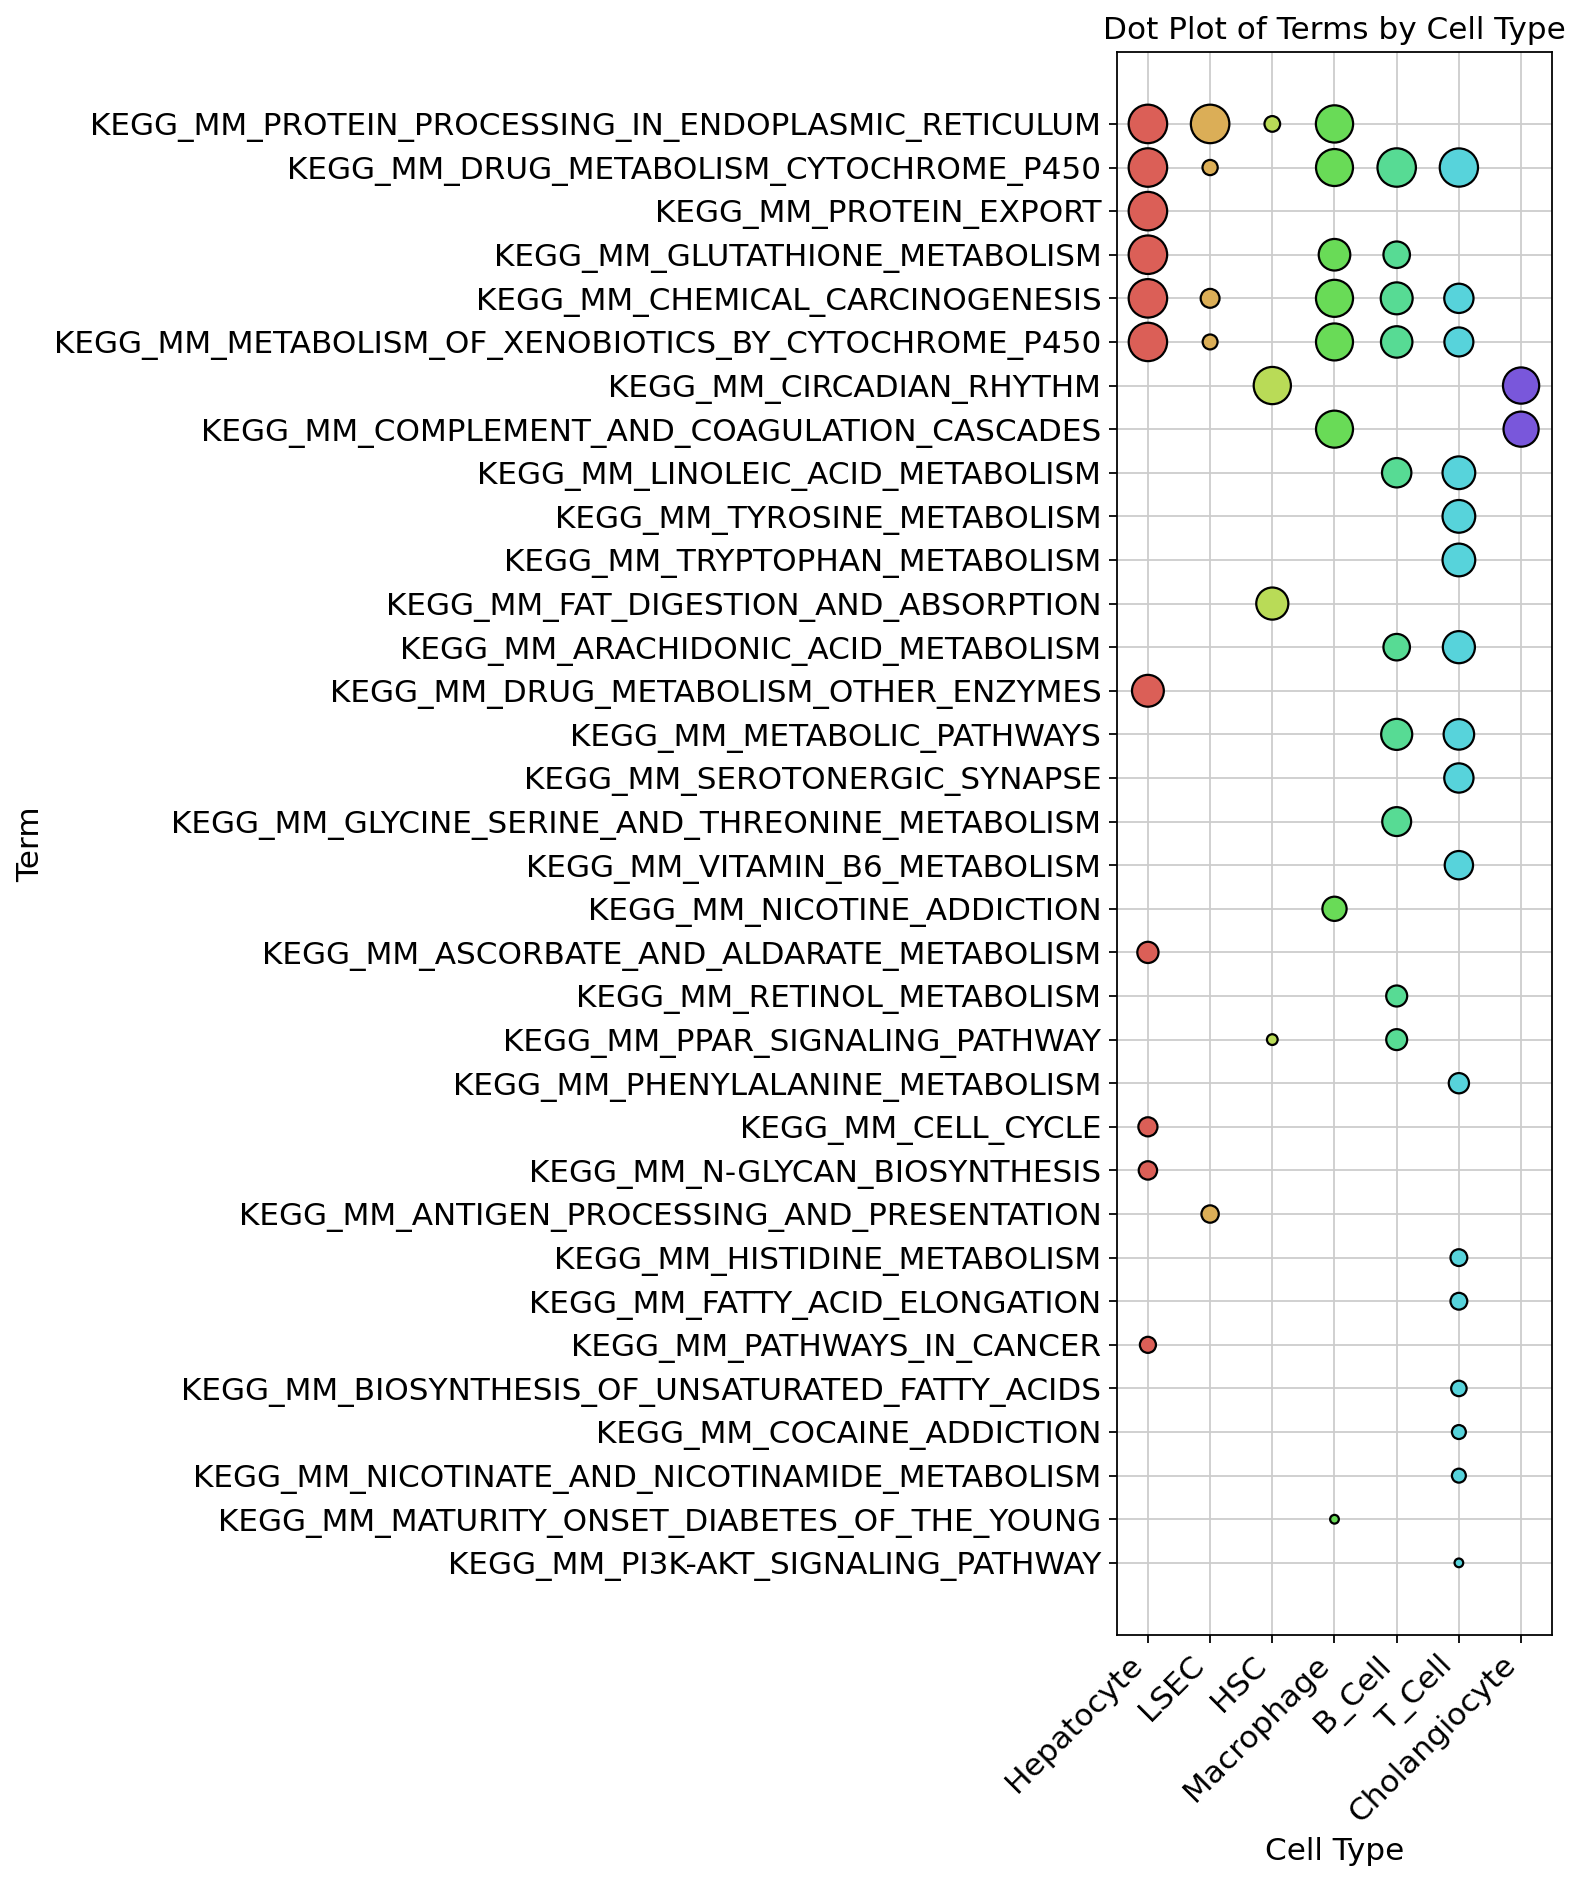

In [88]:
# Create a dot plot
plt.figure(figsize=(10, 12))  # Adjust the figure size as needed
plt.scatter(subset['X_COOR'], 
            subset['Term'], 
            s=subset['Size'], 
            zorder=10, 
            c=subset['Color'], 
            edgecolor='black')
plt.xlabel('Cell Type')
plt.ylabel('Term')
plt.title('Dot Plot of Terms by Cell Type')

# Define the x-axis tick positions and labels based on the mapping dictionary
x_ticks = [celltype_mapping[celltype] for celltype in subset['Celltype'].unique()]
x_labels = [celltype for celltype in subset['Celltype'].unique()]

plt.xticks(x_ticks, x_labels, rotation=45, ha='right')  # Set the x-axis ticks and labels
plt.gca().set_xlim(left=x_ticks[0] - 1.5, right=x_ticks[-1] + 0.5)  # Set x-axis limits

plt.gca().invert_yaxis()  # Invert the y-axis

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()